In [2]:
# from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns # scatterplot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [3]:
# columns = "a1 a2 a3 observe_num gluctose_area insuline_area SSPG relative_weight fasting_plasma_glucose class_name"#.split()
columns = "a1 a2 a3 ob_num glu_a ins_a SSPG rel_w fast_gluc c_name"#.split()
diabetes = pd.read_csv('diabetes.csv', delim_whitespace=True , names=columns.split()) 


# Disregard the first three columns
del diabetes['a1']
del diabetes['a2']
del diabetes['a3']

# delete observation number
del diabetes['ob_num']
print(diabetes.head())
print(type(diabetes))

   glu_a  ins_a  SSPG  rel_w  fast_gluc  c_name
0   0.81     80   356    124         55       3
1   0.95     97   289    117         76       3
2   0.94    105   319    143        105       3
3   1.04     90   356    199        108       3
4   1.00     90   323    240        143       3
<class 'pandas.core.frame.DataFrame'>


In [4]:
# Find unique variables for class_name
unique_set = set(diabetes['c_name'])
print(unique_set)


# test_set = set(diabetes['class_name'])

{1, 2, 3}


/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


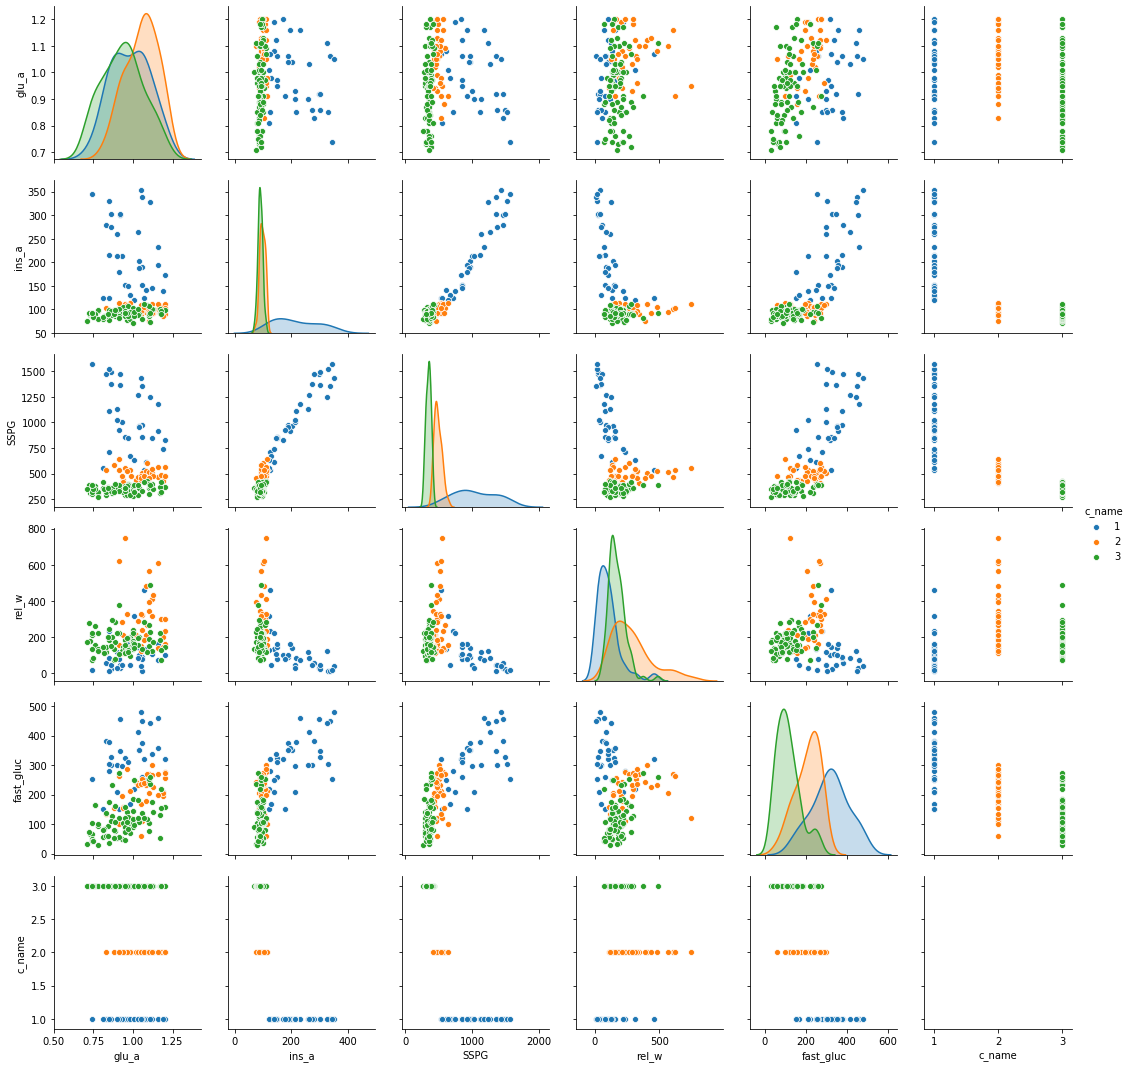

In [5]:
# Scatterplot

seaborn_pair_plot = sns.pairplot(diabetes,hue = 'c_name')
plt.savefig('scatter_plot.png')


# # old plot scatterpltot

# axes = pd.plotting.scatter_matrix(diabetes, alpha=0.5)
# plt.tight_layout()
# plt.savefig('scatter_plot.png')

In [6]:
# Split data train,set


train_set = diabetes.sample(frac=0.8, random_state=0)
test_set = diabetes.drop(train_set.index) 

train_set_labels = train_set.pop('c_name')
test_set_labels = test_set.pop('c_name')

# print(train_set)
# print(train_set_labels)
# print(test_set)
# print(test_set_labels)

In [7]:
# Apply LDA
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(train_set, train_set_labels)
pred=lda_model.predict(test_set) 
print(classification_report(test_set_labels, pred, digits=3))

              precision    recall  f1-score   support

           1      1.000     0.857     0.923         7
           2      0.700     0.875     0.778         8
           3      0.923     0.857     0.889        14

    accuracy                          0.862        29
   macro avg      0.874     0.863     0.863        29
weighted avg      0.880     0.862     0.866        29



In [8]:
# print("priors_ : ", model.priors_)
# print("\nmeans_ : \n", model.means_)
# print(confusion_matrix(pred, test_set_labels))
# print("\ncoef_ : \n" , model.coef_)
# print(np.unique(pred, return_counts=True))

In [9]:

# Apply QDA

qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(train_set, train_set_labels)
pred2=qda_model.predict(test_set)
print("QDA")
print(classification_report(test_set_labels, pred2, digits=3))

QDA
              precision    recall  f1-score   support

           1      1.000     0.857     0.923         7
           2      0.727     1.000     0.842         8
           3      1.000     0.857     0.923        14

    accuracy                          0.897        29
   macro avg      0.909     0.905     0.896        29
weighted avg      0.925     0.897     0.901        29



In [15]:
# Predicting on training set
pred2=qda_model.predict(train_set)
print("LDA")

print(classification_report(train_set_labels, pred2, digits=3))

LDA
              precision    recall  f1-score   support

           1      1.000     0.962     0.980        26
           2      0.931     0.964     0.947        28
           3      0.984     0.984     0.984        62

    accuracy                          0.974       116
   macro avg      0.972     0.970     0.971       116
weighted avg      0.975     0.974     0.974       116



In [11]:

# print(model2.priors_)
# print(model2.means_)
# print(np.unique(pred2, return_counts=True))
# print(confusion_matrix(pred2, test_set_labels))
# print(classification_report(test_set_labels, pred2, digits=3))


In [12]:
# Create individual tester
#individual_tester = np.array([0.98, 122, 544, 186, 184])
individual_tester_df = pd.DataFrame({"ob_num": 999 ,"glu_a": 0.98,"ins_a":122 ,"SSPG":544 ,"rel_w":186 ,"fast_gluc":184 }, index = [0])

del individual_tester_df["ob_num"]
#print(individual_tester_df) 

___Toss individual_tester_df into prediction model, find LDA and QDA's class result___

In [13]:
# QDA 

individual_QDA_prediction =qda_model.predict(individual_tester_df)
print(individual_QDA_prediction) 

[1]


In [14]:
# LDA Results

individual_LDA_prediction=lda_model.predict(individual_tester_df)
print(individual_LDA_prediction)

[3]
